# **🥞 Exploratory Data Analysis**

In [ ]:
%cd /content/drive/MyDrive/DACON/Image_Classification/Landmark/data/
!unzip -qq 'dataset.zip' 

/content/drive/MyDrive/DACON/Image_Classification/Landmark/data


In [ ]:
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

tr_data = list(glob('./train/*'))
tst_data = list(glob('./test/*'))
print(len(tr_data), len(tst_data))

723 199


In [ ]:
import pandas as pd
tr_label_df = pd.read_csv('./train.csv')
print(tr_label_df.shape)
tr_label_df.head()

(723, 2)


,file_name,label
0,001.PNG,9
1,002.PNG,4
2,003.PNG,1
3,004.PNG,1
4,005.PNG,6


(540, 960, 3)


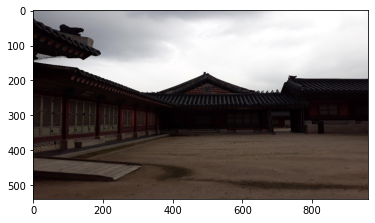

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(tr_data[0])[:,:,::-1] # h, w
print(img.shape)
plt.imshow(img)

(300, 300, 3)


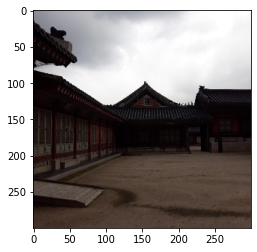

In [ ]:
resized_img = cv2.resize(img, (300,300))
print(resized_img.shape)
plt.imshow(resized_img)

In [ ]:
import plotly.express as px
landmark = tr_label_df.label.value_counts()
landmark_df = pd.DataFrame({'landmark_id':landmark.index, 'frequency':landmark.values})
landmark_df['landmark_id'] = landmark_df.landmark_id.apply(lambda x: f'landmark_id_{x}')

fig = px.bar(landmark_df, x='frequency', y='landmark_id', color='landmark_id',
             hover_data =['landmark_id', 'frequency'],
             height=500b,
             title = 'Number of images per landmark_id',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

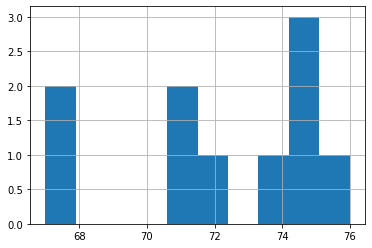

In [ ]:
landmark.hist()

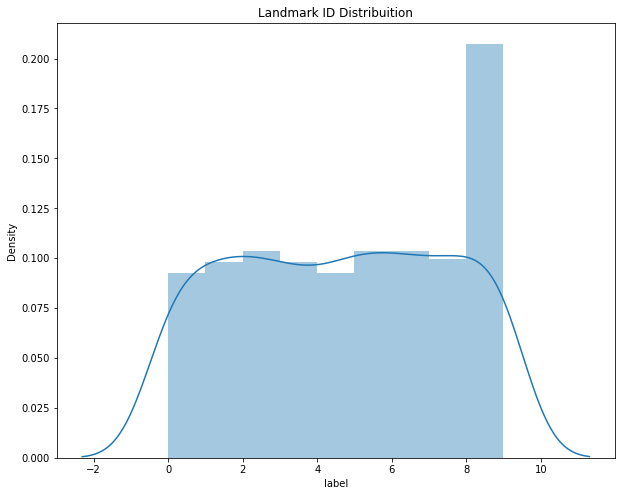

In [ ]:
#Landmark ID distribution
plt.figure(figsize = (10, 8))
plt.title('Landmark ID Distribuition')
sns.distplot(tr_label_df['label'])

plt.show()

In [ ]:
# 고유 레이블 개수
tr_label_df.label.nunique()

10

In [ ]:
landmark[:5]

9    76
6    75
5    75
2    75
8    74
Name: label, dtype: int64

In [ ]:
landmark.describe()

count    10.000000
mean     72.300000
std       3.301515
min      67.000000
25%      71.000000
50%      73.000000
75%      75.000000
max      76.000000
Name: label, dtype: float64

Number of images per landmark_id ranges from `67` to `76`.

median is `73`, mean is `72`

# **🩴 Visualization**

In [ ]:
import PIL
from PIL import Image, ImageDraw
import os

TRAIN_IMAGE_DIR = '/content/drive/MyDrive/DACON/Image_Classification/Landmark/train/'

def display_images(images, title=None):
    '''
    func for displaying images
    '''
    f, ax = plt.subplots(4,5,figsize=(18,22))
    if title:
        f.suptitle(title, fontsize=30)

    for i, image_dir in enumerate(images):
        image_path = os.path.join(TRAIN_IMAGE_DIR,image_dir)
        image = Image.open(image_path)

        ax[i//5, i%5].imshow(image)
        image.close()
        ax[i//5, i%5].axis('off')

        # landmark_id = train[train.id==image_id.split('.')[0]].landmark_id.values[0]
        # ax[i//5, i%5].set_title(f"ID: {image_id.split('.')[0]}\nLandmark_id: {landmark_id}", fontsize="12")
        ax[i//5, i%5].set_title(f"FileName: {image_dir}\nLandmark_label: {tr_label_df[tr_label_df.file_name.str.contains(image_dir.split('.')[0])].label.values[0]}", fontsize="12")

    plt.show()
    print('\n\n')

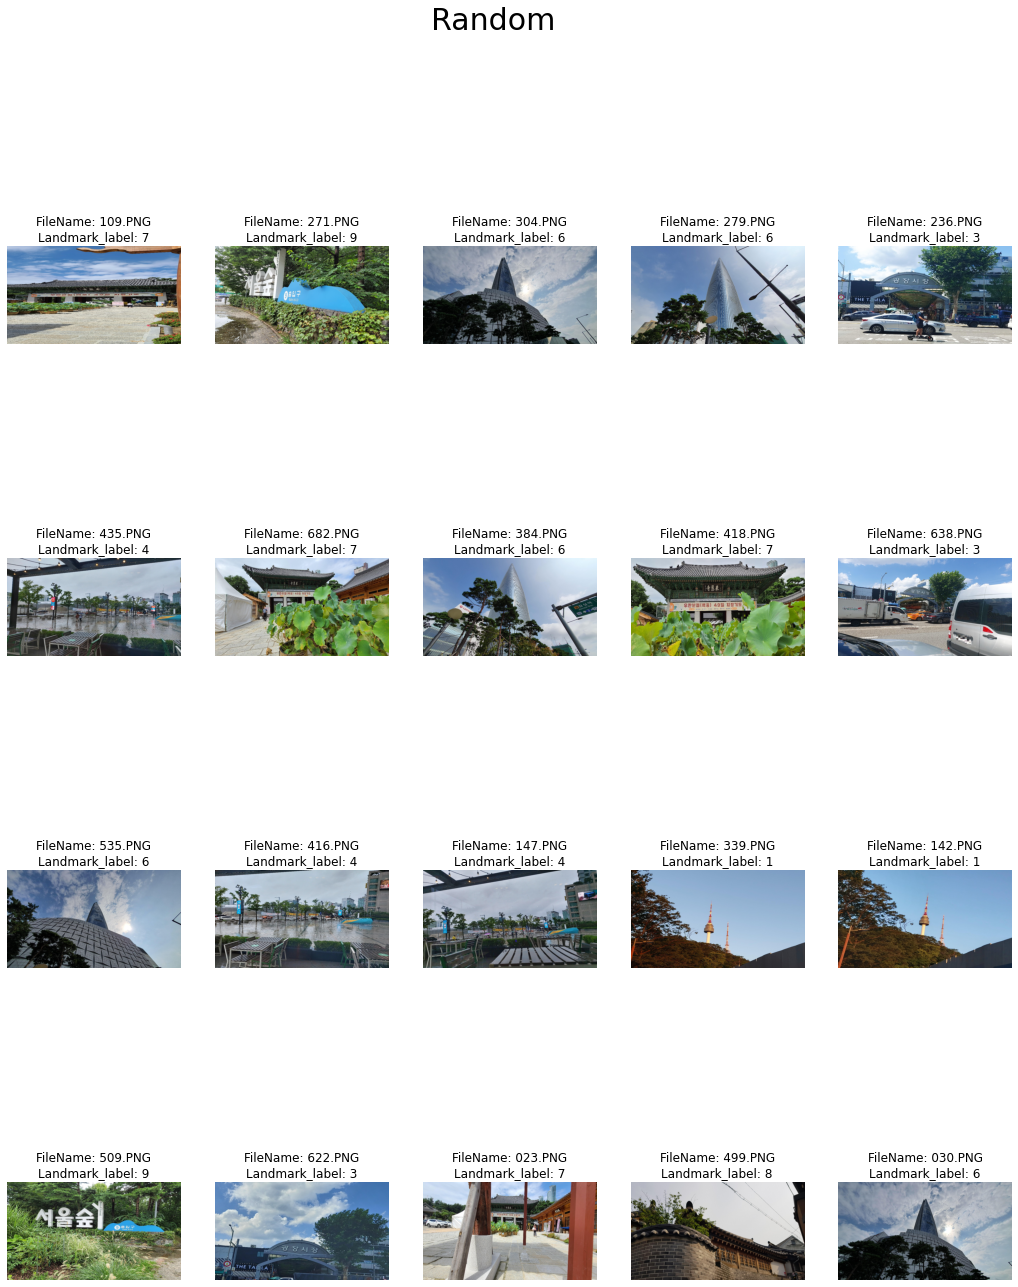

In [ ]:
samples = tr_label_df.file_name.sample(20).values
display_images(samples, 'Random')

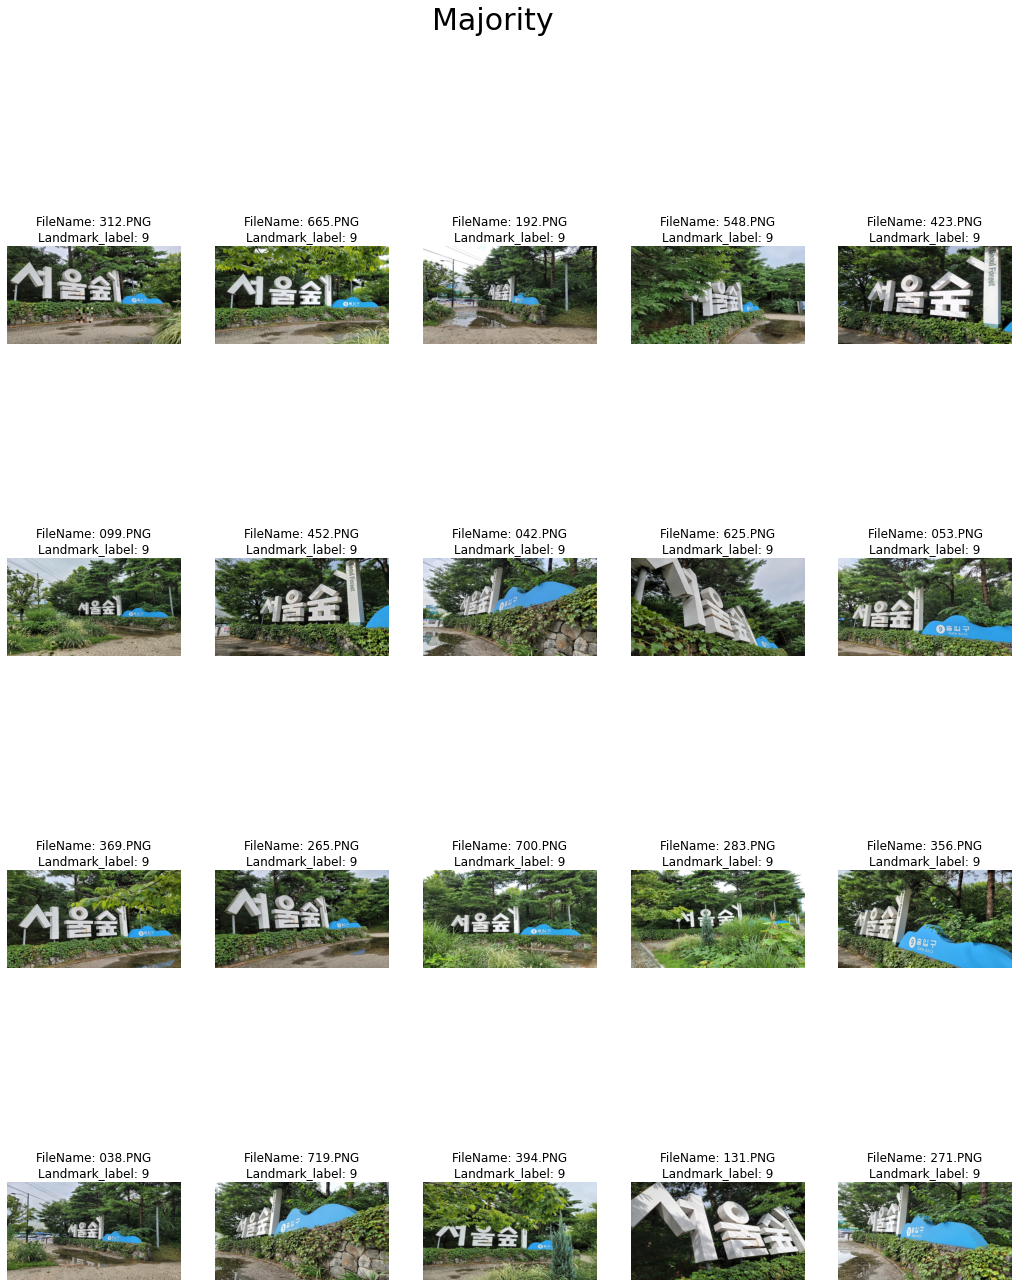

In [ ]:
samples = tr_label_df[tr_label_df.label == 9].file_name.sample(20).values
display_images(samples, 'Majority')

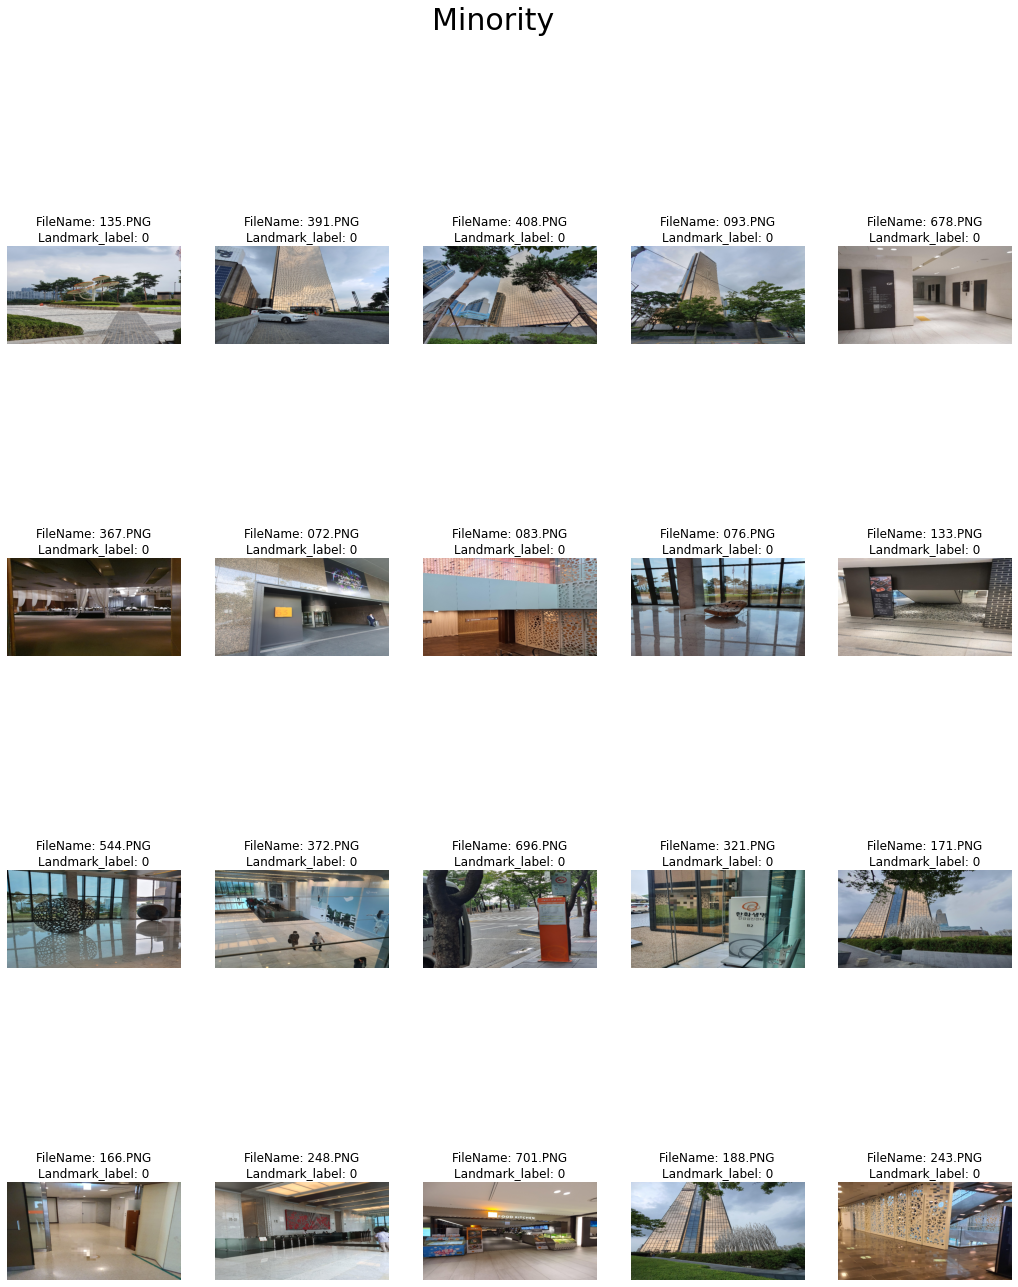

In [ ]:
samples = tr_label_df[tr_label_df.label == 0].file_name.sample(20).values
display_images(samples, 'Minority')

In [ ]:
for i in [1,2,3,4,5,6,7,8]:
    samples = tr_label_df[tr_label_df.label == i].file_name.sample(20).values
    display_images(samples, f'Label {i}')

Output hidden; open in https://colab.research.google.com to view.